In [6]:

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [7]:
image_df = pd.read_csv(r'..\Cases\Image Segmentation\Image_Segmentation.csv')
image_df.head()

,Class,region.centroid.col,region.centroid.row,region.pixel.count,short.line.density.5,short.line.density.2,vedge.mean,vegde.sd,hedge.mean,hedge.sd,intensity.mean,rawred.mean,rawblue.mean,rawgreen.mean,exred.mean,exblue.mean,exgreen.mean,value.mean,saturation.mean,hue-mean
0,BRICKFACE,188,133,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
1,BRICKFACE,105,139,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
2,BRICKFACE,34,137,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
3,BRICKFACE,39,111,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
4,BRICKFACE,16,128,9,0.0,0.0,0.500000,0.077778,0.666667,0.311111,5.555555,6.888889,6.666666,3.111111,4.000000,3.333333,-7.333334,7.111111,0.561508,-0.985811


In [16]:
X= image_df.drop(columns=['Class'])
y= image_df['Class']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   region.centroid.col   209 non-null    int64  
 1   region.centroid.row   209 non-null    int64  
 2   region.pixel.count    209 non-null    int64  
 3   short.line.density.5  209 non-null    float64
 4   short.line.density.2  209 non-null    float64
 5   vedge.mean            209 non-null    float64
 6   vegde.sd              209 non-null    float64
 7   hedge.mean            209 non-null    float64
 8   hedge.sd              209 non-null    float64
 9   intensity.mean        209 non-null    float64
 10  rawred.mean           209 non-null    float64
 11  rawblue.mean          209 non-null    float64
 12  rawgreen.mean         209 non-null    float64
 13  exred.mean            209 non-null    float64
 14  exblue.mean           209 non-null    float64
 15  exgreen.mean          2

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25)

0.9365079365079365

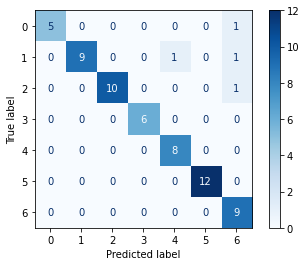

In [10]:


lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
accuracy_score(y_test,y_pred)

In [11]:
lr.coef_,lr.intercept_

(array([[ 1.09595434e-02, -4.32324655e-02,  2.83848930e-01,
         -1.73291230e-04, -2.24657234e-04, -1.56062335e-02,
         -3.88841691e-02,  7.92791736e-03, -1.65477413e-01,
         -2.10077564e-02,  3.05071792e-01,  3.15239706e-03,
         -3.71247523e-01,  9.78238743e-01,  7.24805691e-02,
         -1.05071928e+00, -2.82077682e-02,  1.22630592e-02,
         -1.74143211e-02],
        [ 4.44827303e-03, -1.99009440e-02,  3.85964452e-01,
          3.25969886e-03, -9.36120948e-04,  5.95546372e-02,
          5.15883388e-02, -1.24853406e-01,  1.01922881e-01,
          7.61371009e-03,  5.27675919e-02,  4.92305337e-02,
         -7.91570284e-02,  1.35461869e-01,  1.24850539e-01,
         -2.60312644e-01,  2.69566286e-02,  1.35169130e-02,
         -9.52706106e-02],
        [ 9.83237940e-03, -1.26167407e-02,  3.32082070e-01,
         -3.45204056e-04,  2.50152968e-03,  3.60622816e-01,
          3.64212864e-01,  5.07461314e-01,  6.10580518e-02,
         -1.37810143e-01, -3.06036671e-01, -4.

### inferencing

In [14]:
test_glass = pd.read_csv(r'..\Cases\Image Segmentation\tst_img.csv')
test_glass.head()

,region.centroid.col,region.centroid.row,region.pixel.count,short.line.density.5,short.line.density.2,vedge.mean,vegde.sd,hedge.mean,hedge.sd,intensity.mean,rawred.mean,rawblue.mean,rawgreen.mean,exred.mean,exblue.mean,exgreen.mean,value.mean,saturation.mean,hue-mean
0,22,90,10,0,0,0.666668,0.044444,0.880000,0.562963,112.000000,105.888885,128.555560,106.000000,-22.777779,45.222220,-22.444445,128.555560,0.179697,-2.097815
1,210,200,9,0,0,1.300000,0.998145,1.611111,1.123816,49.481480,45.000000,60.666668,43.000000,-14.111111,35.000000,-19.444445,60.666668,0.290788,-1.987599
2,240,184,9,0,0,0.500000,0.077778,0.777778,0.785185,11.851851,9.777778,9.888889,15.888889,-5.000000,-5.888889,13.000000,15.888889,0.500000,2.128646
3,130,191,9,0,0,1.000000,0.400000,1.500000,1.011111,7.333334,5.333334,5.000000,11.222222,-7.000000,-5.666666,11.666667,11.222222,0.535820,2.122422


In [15]:
y_test_pred=lr.predict(test_glass)
y_test_pred

array(['SKY', 'PATH', 'GRASS', 'GRASS'], dtype=object)